# Exploratory Data Analysis on Biker Count

## Location: Broadway Cycle Track North Of E Union St 

### By: Miguel Morales

In [1]:
URL='https://data.seattle.gov/api/views/j4vh-b42a/rows.csv?accessType=DOWNLOAD'

In [2]:
from urllib.request import urlretrieve      # import package to read in URL
urlretrieve(URL, 'BikeBridge.csv')          # retreived data from url and gives it a name 

('BikeBridge.csv', <http.client.HTTPMessage at 0x10d384a30>)

In [3]:
import pandas as pd
bike_count= pd.read_csv('BikeBridge.csv', index_col="Date", parse_dates=True) # reads in data as a csv, indexing it by a column that are dates. 
bike_count.rename(columns={'Broadway Cycle Track North Of E Union St Total': 'Total'}, inplace=True) 
bike_count.head()

,Total,NB,SB
Date,,,
2019-01-01 00:00:00,5.0,2.0,3.0
2019-01-01 01:00:00,15.0,4.0,11.0
2019-01-01 02:00:00,3.0,1.0,2.0
2019-01-01 03:00:00,0.0,0.0,0.0
2019-01-01 04:00:00,1.0,0.0,1.0


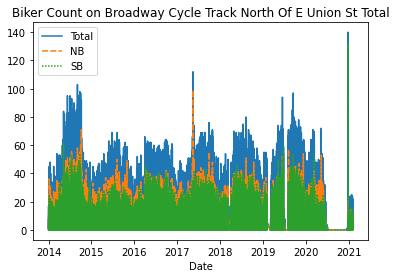

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.title("Biker Count on Broadway Cycle Track North Of E Union St Total")
sns.lineplot(data=bike_count)     # too many data points. 

Text(0.5, 1.0, 'Number of Bikers Per Week')

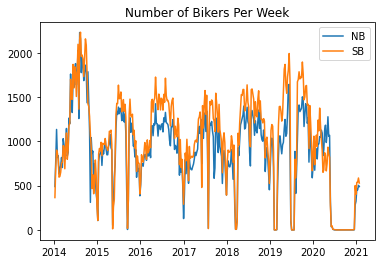

In [5]:
#sns.lineplot(data=bike_count.resample('W').sum()) # dont want to see line for total for now

sns.lineplot(data=bike_count['NB'].resample('W').sum(), label = 'NB')
sns.lineplot(data=bike_count['SB'].resample('W').sum(), label ='SB')
plt.title("Number of Bikers Per Week")

We can see that there are more bike riders passing through this crossing during the middle of the years, possibly due to the warmer temeprature during the summer months. In contrast we see less riders during the end and beginning of the year, possibly due to colder weather. Between 2020-2021, there a a drastic decrease in riders for over half of the year, which is probably due to lockdowns and working from home during the pandemic. 

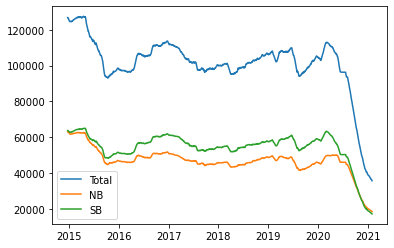

In [6]:
sns.lineplot(data=bike_count['Total'].resample('D').sum().rolling(356).sum(), label = 'Total')
sns.lineplot(data=bike_count['NB'].resample('D').sum().rolling(356).sum(), label = 'NB')
sns.lineplot(data=bike_count['SB'].resample('D').sum().rolling(356).sum(), label ='SB')

We can see that number of riders through the years for both South Bound and North Bound trips are really similar in their trends. However, there seems to be more south bound riders. We also see that toward the end of 2020 and following into 2021, the number of north bound riders surpasses the number of south bound riders.It would be interesting to see if this changes over time. 

Text(0.5, 0, 'Hour of Day')

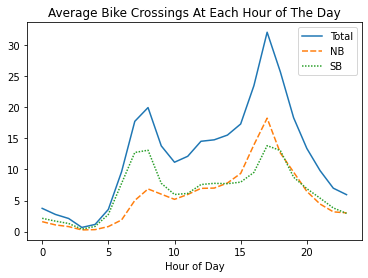

In [7]:
sns.lineplot(data=bike_count.groupby(bike_count.index.hour).mean())
plt.title("Average Bike Crossings At Each Hour of The Day")
plt.xlabel("Hour of Day")

Text(0.5, 0, 'Hour of Day')

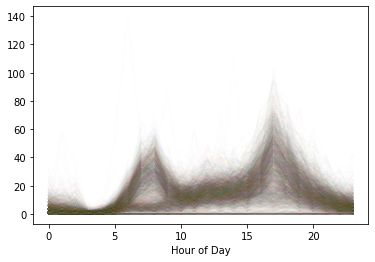

In [8]:
pivot = bike_count.pivot_table('Total', bike_count.index.hour, columns=bike_count.index.date)
pivot.plot(legend=False, alpha=0.01)
plt.xlabel("Hour of Day")

Here we can see that there is somewhat of a bimodial commute pattern as well as seeing it have some lines that indicate weekends as shown the line that undercuts the peaks.